In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('../../decision_trees/CreditScoring.csv')

In [3]:
df.head(3)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985


# Data Cleaning

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.dtypes
# Here some features despite being `int`
# are categorical.
# Ex: status, home, marital, records, job

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [7]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [8]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.dtypes
# look again at changed values

status       object
seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
dtype: object

In [10]:
df.describe().round()
# `max` has some strange big values. It's a type of
# encoding to deal with missing values

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999,
                              value=np.nan)

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [14]:
# remove 'unknown' as we need only default/non-default
df = df[df.status != 'unk'].reset_index(drop=True)

In [15]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [16]:
df.isnull().sum()
# deal with missing further

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=11)

In [19]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = (df_train.status == 'default').astype(int).values
y_valid = (df_valid.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

In [21]:
del df_test['status']
del df_valid['status']
del df_train['status']

In [22]:
df_train.head(4)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079


# Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [24]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [26]:
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [27]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
valid_dicts = df_valid.fillna(0).to_dict(orient='records')
X_valid = dv.transform(valid_dicts)

In [29]:
y_pred = dt.predict_proba(X_valid)[:, 1]

In [30]:
# for valid dataset
roc_auc_score(y_valid, y_pred)

0.7389079944782155

In [31]:
y_pred_train = dt.predict_proba(X_train)[:, 1]

In [32]:
# for train dataset
roc_auc_score(y_train, y_pred_train)

0.7761016984958594

![alt text](overfitting.jpg)

In [33]:
from sklearn.tree import export_text

In [34]:
tree_text = export_text(dt, feature_names=dv.feature_names_)

In [35]:
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



![alt text](dt.jpg)

# Explanation

In [69]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]

In [75]:
df_ex = pd.DataFrame(data, columns=['assets', 'status'])

In [76]:
df_ex.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [74]:
Ts = [2000, 3000, 4000, 5000, 8000]

In [77]:
from IPython.display import display

In [88]:
for t in Ts:
    print(t)
    left= df_ex[df_ex.assets <= t]
    right = df_ex[df_ex.assets > t]
    
    display('left', left)
    print(left.status.value_counts(normalize=True))
    
    display('right', right)
    print(right.status.value_counts(normalize=True))

2000


'left'

,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


'left'

,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


'left'

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


'left'

,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
8000


'left'

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


'right'

,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


![alt text](table.jpg)

![alt text](table2.jpg)

<h3>Decision Tree learning algorithm</h3>
    
    - find the best split
    - stop if max_depth is reached
    - if left is sufficiently large (min_samples_leaf
            isn't reached) AND not pure:
                -> repeat for left
     - if right is sufficiently large (min_samples_leaf
            isn't reached) AND not pure:
                -> repeat for right

+ to measure impurity there are various criteria:
    - gini
    - entropy
    - misclassification

# Parameter tuning

In [33]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_valid)[:,1]
    auc = roc_auc_score(y_valid, y_pred)
    
    print(f"depth: {d}; auc: {round(auc,3)}")

depth: 1; auc: 0.606
depth: 2; auc: 0.669
depth: 3; auc: 0.739
depth: 4; auc: 0.761
depth: 5; auc: 0.766
depth: 6; auc: 0.75
depth: 10; auc: 0.678
depth: 15; auc: 0.664
depth: 20; auc: 0.665
depth: None; auc: 0.651


In [34]:
# min_samples_leaf is a min number of data required
# to be a leaf node
temp_scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_valid)[:,1]
        auc = roc_auc_score(y_valid, y_pred)

        temp_scores.append((d, s, auc))

In [35]:
df_scores = pd.DataFrame(temp_scores,
                columns=['depth', 'min_samples_leaf', 'auc'])

In [36]:
df_scores.sort_values('auc', ascending=False).head(5)

,depth,min_samples_leaf,auc
40,10.0,15,0.788889
49,15.0,15,0.787554
67,NaN,15,0.787275
58,20.0,15,0.786900
22,6.0,15,0.785080


In [37]:
df_pivot = df_scores.pivot(index='min_samples_leaf',
                columns=['depth'], values=['auc'])

# index: row

In [38]:
df_pivot.round(3)

auc                                                 
depth               NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.660  0.761  0.766  0.759  0.750  0.683  0.667  0.654
2                 0.692  0.761  0.767  0.758  0.760  0.716  0.698  0.679
5                 0.718  0.761  0.768  0.762  0.755  0.726  0.721  0.716
10                0.761  0.761  0.762  0.778  0.763  0.770  0.757  0.761
15                0.787  0.764  0.773  0.785  0.780  0.789  0.788  0.787
20                0.781  0.761  0.774  0.774  0.781  0.782  0.782  0.784
100               0.779  0.756  0.763  0.776  0.780  0.779  0.779  0.780
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<AxesSubplot:xlabel='None-depth', ylabel='min_samples_leaf'>

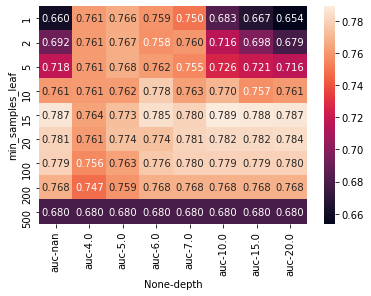

In [39]:
sns.heatmap(df_pivot, annot=True, fmt='.3f')

In [40]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

# Ensemble Learning and Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
y_pred = rf.predict_proba(X_valid)[:, 1]

In [45]:
roc_auc_score(y_valid, y_pred)

0.7830065873919255

In [46]:
# but to make that `random` part the same -> random_state
rf = RandomForestClassifier(n_estimators=10)

In [47]:
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred)

0.774088179022063

In [48]:
scores = []

for i in range(10, 200 + 1, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_pred)
    
    scores.append((i, auc))

In [49]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [50]:
df_scores[::3]

,n_estimators,auc
0,10,0.774473
3,40,0.815686
6,70,0.817321
9,100,0.817599
12,130,0.818253
15,160,0.817981
18,190,0.817981


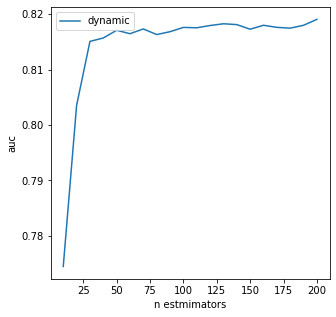

In [51]:
plt.figure(figsize=(5,5))
plt.plot(df_scores['n_estimators'], df_scores['auc'], label='dynamic')
plt.legend()

plt.xlabel('n estmimators')
plt.ylabel('auc')
plt.show()

# Parameter tuning

In [52]:
tune_scores = {}

for d in [5, 10, 20]:
    
    aucs = []
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                    random_state=1, max_depth=d)
        
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred)

        aucs.append(auc)
    
    tune_scores[d] = aucs

<h3>First way of plotting things</h3>

In [53]:
trees = list(range(10, 201, 10))

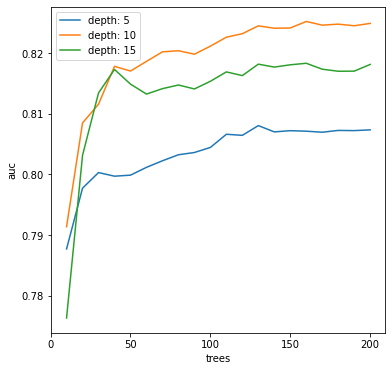

In [54]:
plt.figure(figsize=(6,6))

plt.plot(trees, tune_scores[5], label='depth: 5')
plt.plot(trees, tune_scores[10], label='depth: 10')
plt.plot(trees, tune_scores[20], label='depth: 15')

plt.xlabel('trees')
plt.ylabel('auc')
plt.xticks(range(0, 201, 50))

plt.legend()
plt.show()

<h3>Second way of plotting things</h3>

In [55]:
tune_data = []

for d in [5, 10, 20]:

    for i in range(10, 201, 10):
        
        rf = RandomForestClassifier(n_estimators=i,
                    random_state=1, max_depth=d)

        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred)
        
        tune_data.append((d, i, auc))


In [56]:
df_tunes = pd.DataFrame(tune_data, columns=[
    'depth', 'estimators', 'auc'
])

In [57]:
df_tunes.head(5)

,depth,estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


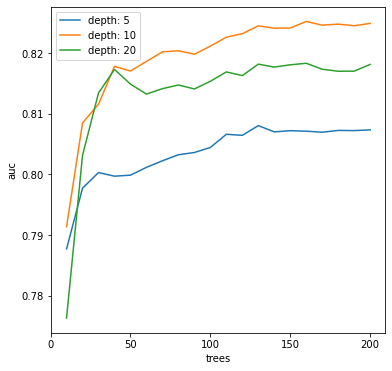

In [58]:
plt.figure(figsize=(6,6))

for d in [5, 10, 20]:
    df_subset = df_tunes[df_tunes.depth == d]
    
    plt.plot(df_subset.estimators, df_subset.auc,
             label=f'depth: {d}')

    plt.xlabel('trees')
    plt.ylabel('auc')
    plt.xticks(range(0, 201, 50))

# put them outside the loop
plt.legend()
plt.show()

In [59]:
tune_data_two = []

for s in [1, 3, 5, 10, 50]:

    for i in range(10, 201, 10):
        
        rf = RandomForestClassifier(n_estimators=i,
                    random_state=1, max_depth=10,
                    min_samples_leaf=s)

        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred)
        
        tune_data_two.append((s, i, auc))


In [60]:
df_samples = pd.DataFrame(
    tune_data_two, columns=['min_leafs', 'trees', 'auc']
)

In [61]:
df_samples.head(4)

,min_leafs,trees,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839


In [62]:
colours = ['red', 'blue', 'green', 'black', 'yellow']
min_samples = [1, 3, 5, 10, 50]

In [63]:
list(zip(colours, min_samples))
# with or without list is okay

[('red', 1), ('blue', 3), ('green', 5), ('black', 10), ('yellow', 50)]

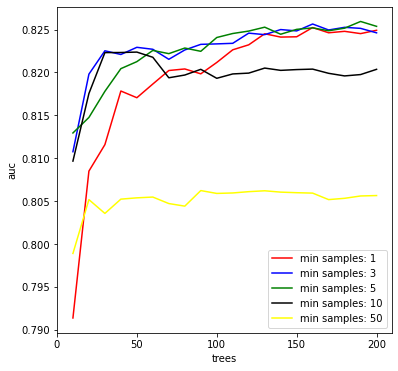

In [64]:
plt.figure(figsize=(6,6))

for c, m in zip(colours, min_samples):
    df_subs = df_samples[df_samples.min_leafs == m]
    
    plt.plot(df_subs.trees, df_subs.auc,
        label=f"min samples: {m}", color=c)
    
    plt.xlabel('trees')
    plt.ylabel('auc')
    plt.xticks(range(0, 201, 50))

# put them outside the loop
plt.legend()
plt.show()

In [65]:
rf = RandomForestClassifier(
    n_estimators=100, random_state=1,
    max_depth=10, min_samples_leaf=3, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

# Gradient boosting and XGBoost

![alt text](gradient.jpg)

In [66]:
import xgboost as xgb

In [67]:
dtrain = xgb.DMatrix(X_train, label=y_train,
            feature_names=dv.feature_names_)

In [68]:
dvalid = xgb.DMatrix(X_valid, label=y_valid,
                feature_names=dv.feature_names_)

In [69]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [70]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[12:10:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
y_pred = model.predict(dvalid)

In [72]:
roc_auc_score(y_valid, y_pred)

0.8152745150274878

In [73]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [74]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain,
            num_boost_round=201, evals=watchlist,
            verbose_eval=5)

In [75]:
print(output.stdout)

[0]	train-auc:0.86300	valid-auc:0.76818
[5]	train-auc:0.92863	valid-auc:0.80606
[10]	train-auc:0.95002	valid-auc:0.81558
[15]	train-auc:0.96558	valid-auc:0.81680
[20]	train-auc:0.97316	valid-auc:0.81775
[25]	train-auc:0.98174	valid-auc:0.81878
[30]	train-auc:0.98772	valid-auc:0.81788
[35]	train-auc:0.99180	valid-auc:0.81510
[40]	train-auc:0.99456	valid-auc:0.81387
[45]	train-auc:0.99596	valid-auc:0.81462
[50]	train-auc:0.99688	valid-auc:0.81128
[55]	train-auc:0.99787	valid-auc:0.80874
[60]	train-auc:0.99889	valid-auc:0.80801
[65]	train-auc:0.99919	valid-auc:0.80751
[70]	train-auc:0.99944	valid-auc:0.80732
[75]	train-auc:0.99964	valid-auc:0.80692
[80]	train-auc:0.99985	valid-auc:0.80677
[85]	train-auc:0.99986	valid-auc:0.80671
[90]	train-auc:0.99991	valid-auc:0.80637
[95]	train-auc:0.99996	valid-auc:0.80580
[100]	train-auc:0.99999	valid-auc:0.80508
[105]	train-auc:0.99999	valid-auc:0.80603
[110]	train-auc:1.00000	valid-auc:0.80527
[115]	train-auc:1.00000	valid-auc:0.80382
[120]	train-au

<h3>First way of plotting</h3>

In [76]:
def parse_output(output):
    tree_list = []
    aucs_train = []
    aucs_valid = []
    
    for line in output.stdout.strip().split('\n'):
        tree, train, valid = line.split('\t')
        
        iteration = int(tree.strip('[]'))
        train = float(train.split(':')[1])
        valid = float(valid.split(':')[1])
        
        tree_list.append(iteration)
        aucs_train.append(train)
        aucs_valid.append(valid)
    
    return tree_list, aucs_train, aucs_valid

In [77]:
tree_boost , train_boost , valid_boost = parse_output(output)

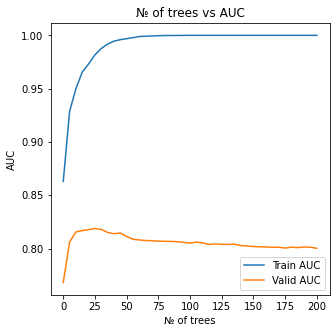

In [78]:
plt.figure(figsize=(5,5))
plt.plot(tree_boost, train_boost, label='Train AUC')
plt.plot(tree_boost, valid_boost, label='Valid AUC')
plt.xticks(range(0, 201, 25))

plt.title('№ of trees vs AUC')
plt.xlabel('№ of trees')
plt.ylabel('AUC')

plt.legend()
plt.show()

<h3>Second way of plotting</h3>

In [79]:
def parse_output_two(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        tree, train, valid = line.split('\t')
        
        iteration = int(tree.strip('[]'))
        train = float(train.split(':')[1])
        valid = float(valid.split(':')[1])
        
        results.append((iteration, train, valid))
    
    df_boost = pd.DataFrame(results, columns=[
        'number of iteration', 'train auc', 'valid auc'
    ])
    
    return df_boost

In [80]:
df_results = parse_output_two(output)

In [81]:
df_results[::10]

,number of iteration,train auc,valid auc
0,0,0.86300,0.76818
10,50,0.99688,0.81128
20,100,0.99999,0.80508
30,150,1.00000,0.80184
40,200,1.00000,0.80024


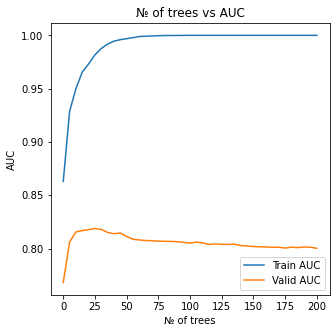

In [82]:
plt.figure(figsize=(5,5))

plt.plot(df_results['number of iteration'],
         df_results['train auc'], label='Train AUC')

plt.plot(df_results['number of iteration'],
         df_results['valid auc'], label='Valid AUC')

plt.xticks(range(0, 201, 25))

plt.title('№ of trees vs AUC')
plt.xlabel('№ of trees')
plt.ylabel('AUC')

plt.legend()
plt.show()

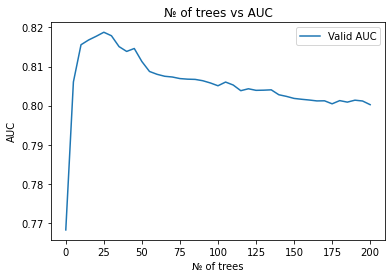

In [83]:
plt.plot(df_results['number of iteration'],
         df_results['valid auc'], label='Valid AUC')

plt.xticks(range(0, 201, 25))

plt.title('№ of trees vs AUC')
plt.xlabel('№ of trees')
plt.ylabel('AUC')

plt.legend()
plt.show()

# Parameter tuning for XGBoost

In [88]:
scores = {}

In [97]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [98]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_output_two(output)

In [99]:
scores[key][::5]

,number of iteration,train auc,valid auc
0,0,0.86300,0.76818
5,25,0.98174,0.81878
10,50,0.99688,0.81128
15,75,0.99964,0.80692
20,100,0.99999,0.80508
25,125,1.00000,0.80391
30,150,1.00000,0.80184
35,175,1.00000,0.80046
40,199,1.00000,0.80032


In [100]:
%%capture output

xgb_params = {
    'eta': 1.0,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [101]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_output_two(output)

In [102]:
scores[key][::5]

,number of iteration,train auc,valid auc
0,0,0.8630,0.76818
5,25,0.9998,0.78252
10,50,1.0000,0.77784
15,75,1.0000,0.78030
20,100,1.0000,0.78261
25,125,1.0000,0.78382
30,150,1.0000,0.78364
35,175,1.0000,0.78405
40,199,1.0000,0.78394


In [103]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [104]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_output_two(output)

In [105]:
scores[key][::5]

,number of iteration,train auc,valid auc
0,0,0.86300,0.76818
5,25,0.94793,0.81202
10,50,0.97014,0.82348
15,75,0.98309,0.82356
20,100,0.99056,0.82371
25,125,0.99472,0.82091
30,150,0.99690,0.81946
35,175,0.99821,0.81859
40,199,0.99914,0.81751


In [106]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [107]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_output_two(output)

In [108]:
scores[key][::5]

,number of iteration,train auc,valid auc
0,0,0.86300,0.76818
5,25,0.92229,0.80493
10,50,0.94492,0.81151
15,75,0.95826,0.81526
20,100,0.96827,0.82078
25,125,0.97477,0.82302
30,150,0.98089,0.82142
35,175,0.98523,0.82041
40,199,0.98864,0.82008


In [109]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [110]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_output_two(output)

In [111]:
scores[key][::5]

,number of iteration,train auc,valid auc
0,0,0.86300,0.76818
5,25,0.87859,0.77861
10,50,0.89299,0.79683
15,75,0.90577,0.80068
20,100,0.91428,0.80422
25,125,0.92115,0.80691
30,150,0.92709,0.80890
35,175,0.93123,0.81075
40,199,0.93648,0.81128


In [112]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

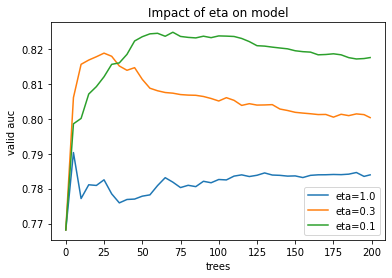

In [119]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_sub = scores[eta]
    
    plt.plot(df_sub['number of iteration'],
             df_sub['valid auc'],
             label=eta
    )

plt.title('Impact of eta on model')
plt.ylabel('valid auc')
plt.xlabel('trees')

plt.legend()
plt.show()

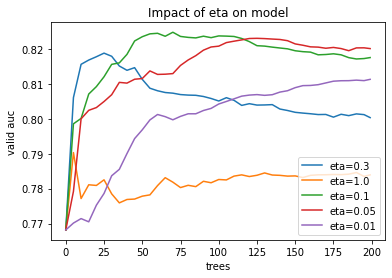

In [116]:
for key, df_temp in scores.items():
    plt.plot(df_temp['number of iteration'],
             df_temp['valid auc'],
             label=key
    )

plt.title('Impact of eta on model')
plt.ylabel('valid auc')
plt.xlabel('trees')

plt.legend()
plt.show()

<h3>Now let's deal with max depth</h3>

In [120]:
scores_2 = {}

In [124]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [125]:
key = f"max_depth={xgb_params['max_depth']}"
scores_2[key] = parse_output_two(output)

In [127]:
scores_2[key][::5]

,number of iteration,train auc,valid auc
0,0,0.86300,0.76818
5,25,0.94793,0.81202
10,50,0.97014,0.82348
15,75,0.98309,0.82356
20,100,0.99056,0.82371
25,125,0.99472,0.82091
30,150,0.99690,0.81946
35,175,0.99821,0.81859
40,199,0.99914,0.81751


In [128]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [129]:
key = f"max_depth={xgb_params['max_depth']}"
scores_2[key] = parse_output_two(output)

In [131]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [132]:
key = f"max_depth={xgb_params['max_depth']}"
scores_2[key] = parse_output_two(output)

In [133]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [134]:
key = f"max_depth={xgb_params['max_depth']}"
scores_2[key] = parse_output_two(output)

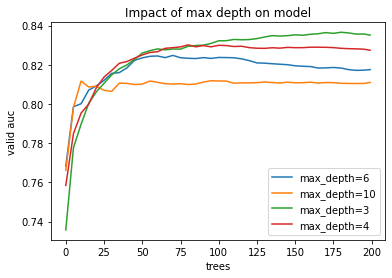

In [135]:
for key, df_temp in scores_2.items():
    plt.plot(df_temp['number of iteration'],
             df_temp['valid auc'],
             label=key
    )

plt.title('Impact of max depth on model')
plt.ylabel('valid auc')
plt.xlabel('trees')

plt.legend()
plt.show()

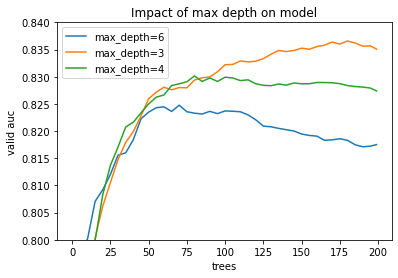

In [139]:
# let's remove 10 and zoom in

for key, df_temp in scores_2.items():
    if key == 'max_depth=10':
        continue
    
    plt.plot(df_temp['number of iteration'],
             df_temp['valid auc'],
             label=key
    )

plt.ylim(0.8, 0.84)
plt.title('Impact of max depth on model')
plt.ylabel('valid auc')
plt.xlabel('trees')

plt.legend()
plt.show()

<h3>Finally, min_child_weight</h3>

In [142]:
scores_3 = {}

In [147]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [148]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
scores_3[key] = parse_output_two(output)

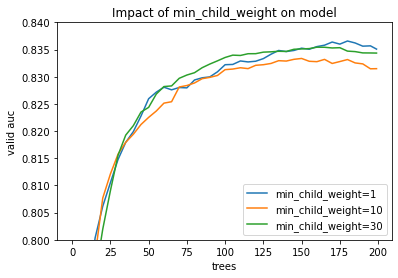

In [150]:
for key, df_temp in scores_3.items():
    plt.plot(df_temp['number of iteration'],
             df_temp['valid auc'],
             label=key
    )

plt.ylim(0.80, 0.84)
plt.title('Impact of min_child_weight on model')
plt.ylabel('valid auc')
plt.xlabel('trees')

plt.legend()
plt.show()

<h3>Final XGBoost model</h3>

    - also we tweak `num_boost_round`

In [151]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

# Final model

In [152]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [155]:
rf = RandomForestClassifier(
    n_estimators=200, random_state=1,
    max_depth=10, min_samples_leaf=3, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)

In [154]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [159]:
y_pred = dt.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred)

0.7853194400716863

In [160]:
y_pred = rf.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred)

0.8246258264512848

In [162]:
y_pred = model.predict(dvalid)
roc_auc_score(y_valid, y_pred)

0.8360387251459157

In [163]:
full_train.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750


In [167]:
full_train = full_train.reset_index(drop=True)

In [168]:
y_full_train = (full_train['status'] == 'default').astype(int).values

In [169]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [170]:
del full_train['status']

In [172]:
dict_full_train = full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(dict_full_train)

dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)

In [175]:
dFullTrain = xgb.DMatrix(X_full_train, label=y_full_train,
                         feature_names=dv.feature_names_)

In [176]:
dTest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [177]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc',
}

model = xgb.train(xgb_params, dFullTrain, num_boost_round=175)

In [178]:
y_pred = model.predict(dTest)

In [179]:
roc_auc_score(y_test, y_pred)

0.8322662626460096